# Elrejtett bizonyíték
Egy bűnügyi nyomozást vezetsz. Megalapozott gyanúd van egy vádlottal szemben, azonban a házában lefoglalt dolgok között nem találsz bizonyítékot.

Találtál viszont egy mappányi képet erdőtüzekről, amiket úgy látod gyakran nyitottak meg az elmúlt időszakban, de ránézésre nincs rajtuk semmi furcsa.

Próbálj ezen az adathalmazon elrejtett nyomokat keresni! (OCR (optical character recognition), keras_ocr) Mit találtál?

A feladathoz használj GPUt!

In [1]:
!pip install keras-ocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.0 MB/s eta 0:00:00


In [2]:
import keras_ocr
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image
import os

plt.style.use('ggplot')

In [3]:
!gdown 1S97cIKlWhCoNgTfw2pgoT-7HoZEi-Osw
!unzip fire_images.zip

Downloading...
From: https://drive.google.com/uc?id=1S97cIKlWhCoNgTfw2pgoT-7HoZEi-Osw
To: /content/fire_images.zip
100% 5.82M/5.82M [00:00<00:00, 365MB/s]
Archive:  fire_images.zip
   creating: fire_images/
  inflating: fire_images/473.jpg     
  inflating: fire_images/296.jpg     
  inflating: fire_images/238.jpg     
  inflating: fire_images/213.jpg     
  inflating: fire_images/491.jpg     
  inflating: fire_images/92.jpg      
  inflating: fire_images/474.jpg     
  inflating: fire_images/404.jpg     
  inflating: fire_images/347.jpg     
  inflating: fire_images/302.jpg     
  inflating: fire_images/120.jpg     
  inflating: fire_images/481.jpg     
  inflating: fire_images/165.jpg     
  inflating: fire_images/480.jpg     
  inflating: fire_images/163.jpg     
  inflating: fire_images/52.jpg      
  inflating: fire_images/314.jpg     
  inflating: fire_images/316.jpg     
  inflating: fire_images/222.jpg     
  inflating: fire_images/199.jpg     
  inflating: fire_images/119.jpg 

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [5]:
import os

folder_path = "/content/fire_images"

file_paths = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Create the full path to the file and append it to the list
        file_path = os.path.join(folder_path, filename)
        file_paths.append(file_path)

print(file_paths)

['/content/fire_images/350.jpg', '/content/fire_images/427.jpg', '/content/fire_images/431.jpg', '/content/fire_images/423.jpg', '/content/fire_images/79.jpg', '/content/fire_images/8.jpg', '/content/fire_images/94.jpg', '/content/fire_images/456.jpg', '/content/fire_images/98.jpg', '/content/fire_images/368.jpg', '/content/fire_images/196.jpg', '/content/fire_images/20.jpg', '/content/fire_images/197.jpg', '/content/fire_images/440.jpg', '/content/fire_images/469.jpg', '/content/fire_images/393.jpg', '/content/fire_images/153.jpg', '/content/fire_images/229.jpg', '/content/fire_images/73.jpg', '/content/fire_images/379.jpg', '/content/fire_images/458.jpg', '/content/fire_images/321.jpg', '/content/fire_images/175.jpg', '/content/fire_images/338.jpg', '/content/fire_images/485.jpg', '/content/fire_images/479.jpg', '/content/fire_images/409.jpg', '/content/fire_images/365.jpg', '/content/fire_images/414.jpg', '/content/fire_images/167.jpg', '/content/fire_images/190.jpg', '/content/fire

In [6]:
images = [
    keras_ocr.tools.read(file) for file in file_paths
]


In [7]:
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 3s 3s/step


[('passport', array([[152.,  17.],
       [205.,  17.],
       [205.,  26.],
       [152.,  26.]], dtype=float32))]
[[[168  90  42]
  [162  84  36]
  [158  80  32]
  ...
  [ 49  30  23]
  [ 48  30  20]
  [ 55  37  27]]

 [[159  81  33]
  [152  74  26]
  [149  71  23]
  ...
  [ 34  17   7]
  [ 34  16   6]
  [ 41  24  14]]

 [[160  80  31]
  [153  73  24]
  [150  70  21]
  ...
  [ 27  13   4]
  [ 29  12   4]
  [ 35  21  12]]

 ...

 [[241 144  39]
  [232 136  26]
  [223 125  14]
  ...
  [  4   3   1]
  [  4   3   1]
  [ 18  17  15]]

 [[239 138  30]
  [230 129  21]
  [246 149  36]
  ...
  [  6   5   3]
  [  1   0   0]
  [ 15  14  12]]

 [[243 145  36]
  [235 137  26]
  [255 158  45]
  ...
  [ 20  19  17]
  [ 20  19  17]
  [ 34  33  31]]]
[('s', array([[-7.347881e-16,  1.250000e+02],
       [ 1.500000e+01,  1.250000e+02],
       [ 1.500000e+01,  1.490000e+02],
       [ 0.000000e+00,  1.490000e+02]], dtype=float32))]
[[[252 201 118]
  [250 199 116]
  [249 198 115]
  ...
  [149  57  18]
  [

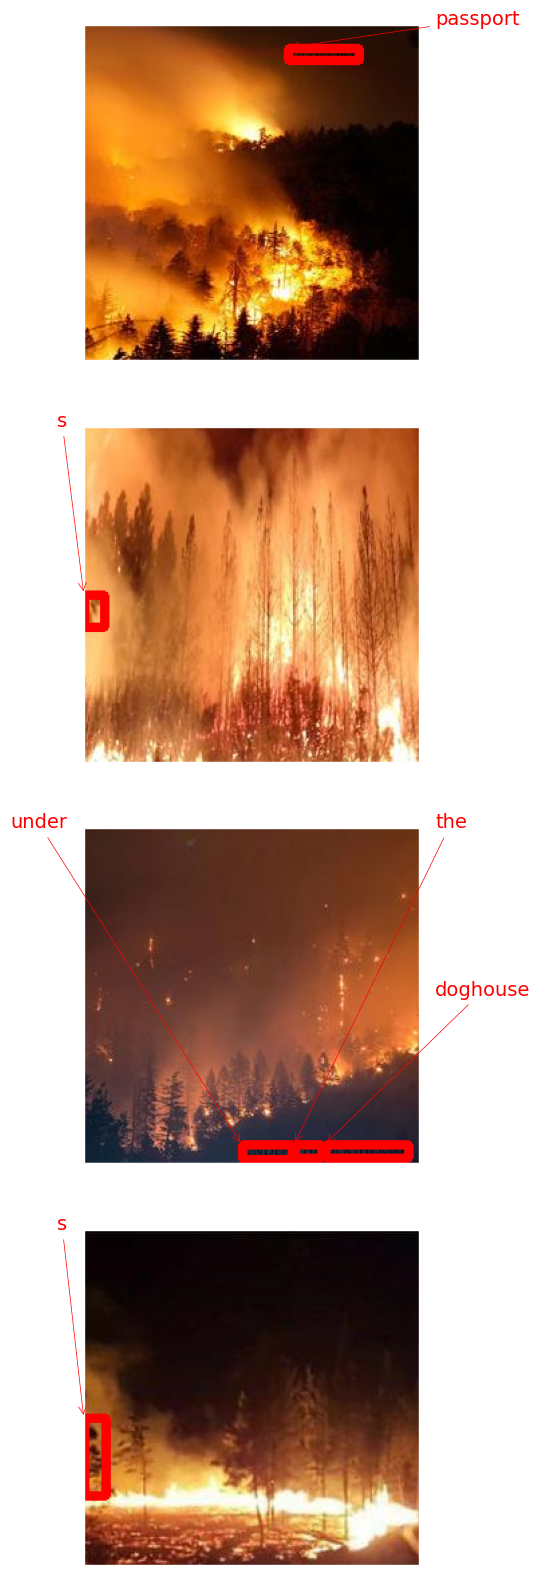

In [20]:
import cv2
i = 0
fig, axs = plt.subplots(nrows=4, figsize=(20, 20))
for image, predictions in zip(images, prediction_groups):
    if predictions:
      print(predictions)
      ax = axs[i]
      i += 1
      keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
